## Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve,classification_report
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Train1.0.csv", sep=',',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_night_minutes            4250 non-null   float64
 8   total_night_calls              4250 non-null   int64  
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   int64 

In [3]:
X=data.drop('churn',axis=1)
y=data.churn

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(3400, 12)

In [6]:
X_test.shape

(850, 12)

#### Linear Regression

In [8]:
LR = LogisticRegression().fit(X_train,y_train)

In [9]:
round(LR.score(X_test,y_test),4)

0.8435

0.866764705882353 500


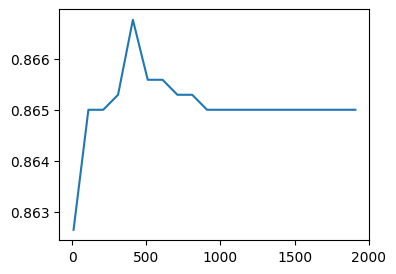

In [10]:
score = []
for i in range(100,2001,100):
    lr = LogisticRegression(max_iter=i,random_state=0)
    score_ = cross_val_score(lr,X_train,y_train,cv=10).mean()
    score.append(score_)
print(max(score),np.arange(100, 2001, 100)[np.argmax(score)])
plt.figure(figsize=(4,3))
plt.plot(range(10,2001,100),score)
plt.show()

0.8691176470588236 0.01


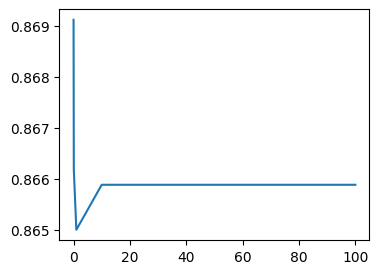

In [11]:
score_2 = []
for i in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(max_iter=1700,C=i, random_state=0)
    score_ = cross_val_score(lr,X_train,y_train,cv=10).mean()
    score_2.append(score_)
print(max(score_2), [0.01, 0.1, 1, 10, 100][np.argmax(score_2)])
plt.figure(figsize=(4,3))
plt.plot([0.01, 0.1, 1, 10, 100],score_2)
plt.show()

0.8691176470588236 lbfgs


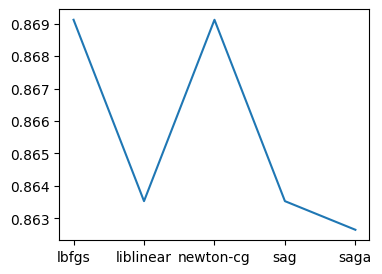

In [12]:
score_3 = []
for i in  ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    lr = LogisticRegression(max_iter=1700,C=0.01, solver=i, random_state=0)
    score_ = cross_val_score(lr,X_train,y_train,cv=10).mean()
    score_3.append(score_)
print(max(score_3),  ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'][np.argmax(score_3)])
plt.figure(figsize=(4,3))
plt.plot( ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],score_3)
plt.show()

In [13]:
LR = LogisticRegression(max_iter=1700, C=0.01, solver='lbfgs',random_state=0).fit(X_train,y_train)
round(LR.score(X_test, y_test),4)

0.8565

In [14]:
y_pred = LR.predict(X_test)

In [15]:
round(roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1]),4)

0.7903

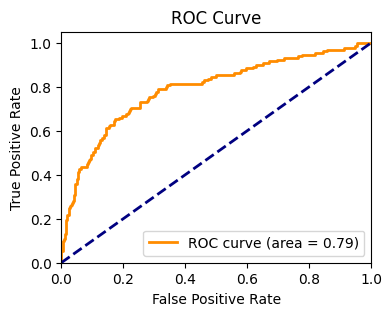

In [16]:
fpr, tpr, _ = roc_curve(y_test, LR.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

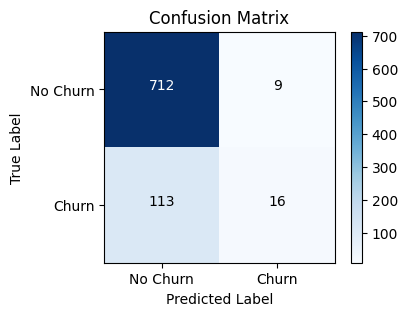

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       721
           1       0.64      0.12      0.21       129

    accuracy                           0.86       850
   macro avg       0.75      0.56      0.56       850
weighted avg       0.83      0.86      0.81       850



The model performs well in identifying not churned customers, that most of the not churned customers are correctly predicted, and that a high proportion of the true not churned customers are correctly predicted in the samples that are correctly predicted as not churned customers.

But it performs weakly in identifying churned customers, that only a small proportion of churned customers are correctly predicted as churned, and that a low proportion of true churned customers are correctly predicted in the sample of correctly predicted churned customers.

This is most likely due to the uneven distribution of data. Logistic Regression may not be suitable for unbalanced data.

#### Random Forest 

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
round(clf.score(X_test, y_test),4)

0.9576

In [9]:
score = cross_val_score(clf,X_train,y_train,cv=10).mean()
score

0.9502941176470587

In [10]:
round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]),4)

0.9104

0.9547058823529412 210


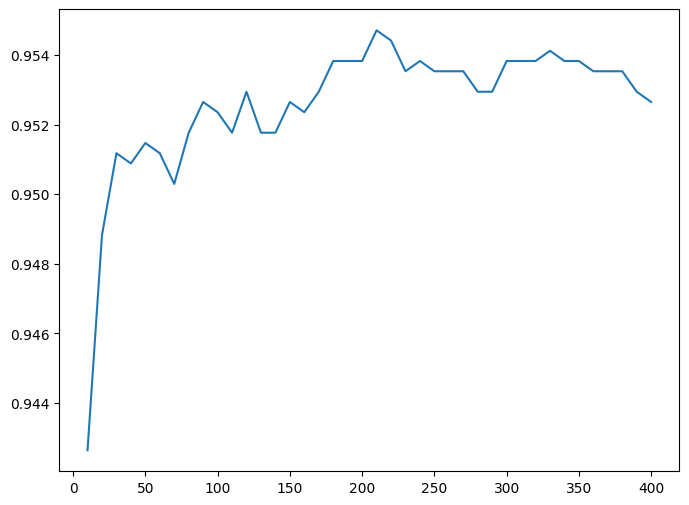

In [11]:
score = []
for i in range(10,401,10):
    rfc = RandomForestClassifier(n_estimators= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score.append(score_)
print(max(score),np.arange(10, 401, 10)[np.argmax(score)])
plt.figure(figsize=(8,6))
plt.plot(range(10,401,10),score)
plt.show()

0.9549999999999998 15


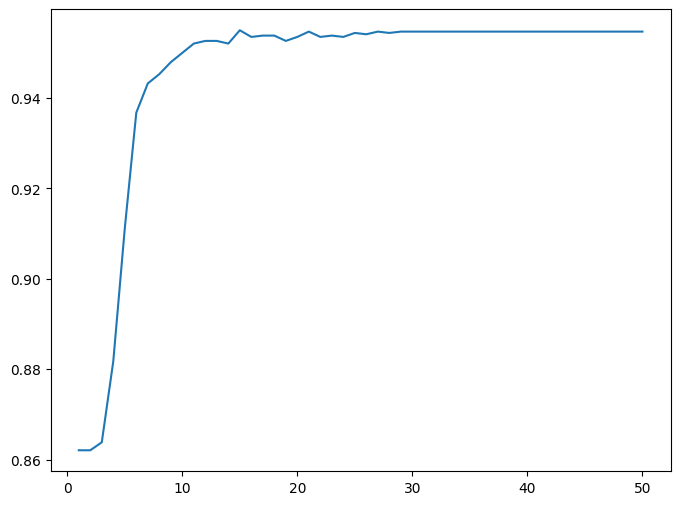

In [12]:
score_2= []
for i in np.arange(1, 51, 1):
    rfc = RandomForestClassifier(n_estimators=210,max_depth= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_2.append(score_)
print(max(score_2),np.arange(1, 51, 1)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 51, 1),score_2)
plt.show()

0.9549999999999998 1


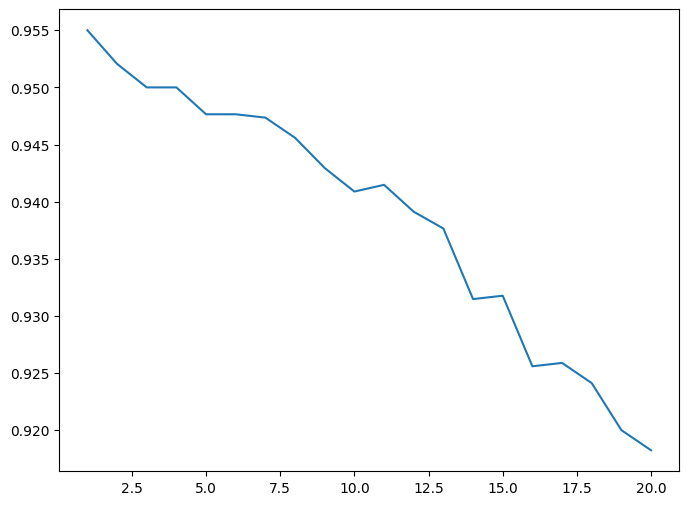

In [13]:
score_3 = []
for i in np.arange(1, 21, 1):
    rfc = RandomForestClassifier(n_estimators= 210,max_depth= 15, min_samples_leaf = i, random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_3.append(score_)
print(max(score_3),np.arange(1, 21, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 21, 1),score_3)
plt.show()

0.9549999999999998 2


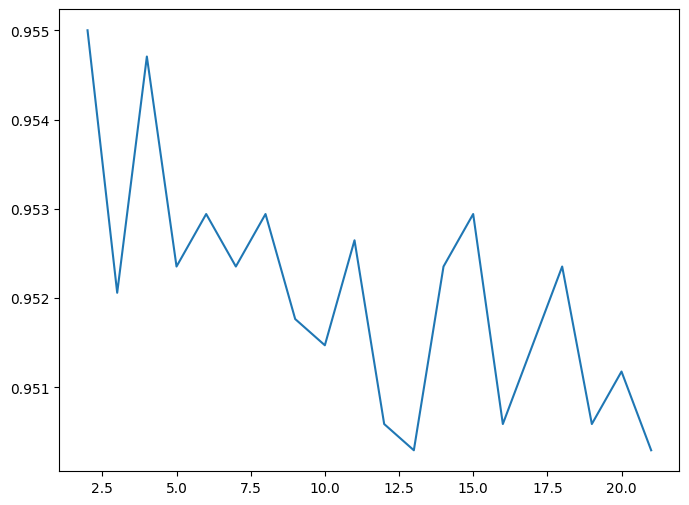

In [14]:
score_5 = []
for i in np.arange(2, 22, 1):
    rfc = RandomForestClassifier(n_estimators= 210,max_depth= 15, min_samples_leaf = 1, min_samples_split= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_5.append(score_)
print(max(score_5),np.arange(2, 22, 1)[np.argmax(score_5)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_5)
plt.show()

In [15]:
clf = RandomForestClassifier(n_estimators=210
         ,max_depth=15
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(X_train,y_train)

In [16]:
round(clf.score(X_test,y_test),4)

0.9518

In [17]:
round(f1_score(y_test, clf.predict(X_test)),4)

0.8225

In [18]:
round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]),4)

0.9099

In [ ]:
clf2 = RandomForestClassifier(n_estimators=60
         ,max_depth=16
         ,max_features=6
         ,min_samples_leaf=1
         ,min_samples_split=2
         )
clf2 = clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

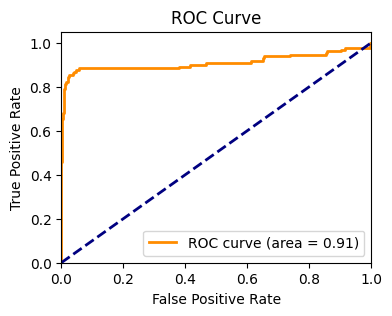

In [75]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()